In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.svm import LinearSVR
import missingno as msno
import optuna

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train

,Id,Target,N1,N2,N3,N4,N5,N6,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,10000,1500000,2056164.384,11,1.8,0.0,9.0,6.0,1,M,F,V,B,S,J,T,D
1,10001,2993000,3572619.048,8,2.5,8.0,6.0,9.0,2,A,F,V,B,S,J,N,1
2,10002,9500000,9813953.488,6,3.5,2.0,9.0,0.0,1,A,B,K,B,S,W,D,D
3,10003,4056000,4529545.455,5,2.5,4.0,6.0,4.0,1,A,F,K,BG,S,4,T,1
4,10004,3543000,3823255.814,10,3.5,1.0,5.0,4.0,1,A,F,K,BG,S,4,T,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14995,2023000,2200000.000,14,2.2,5.0,5.0,5.0,1,M,F,V,D,M,W,D,F
4996,14996,2000000,2265060.241,14,3.0,8.0,2.0,7.0,1,A,F,K,B,S,4,T,1
4997,14997,4040000,4691666.667,11,3.3,3.0,2.0,5.0,2,A,F,K,B,C,J,T,E
4998,14998,1400000,1519047.619,9,1.6,2.0,0.0,7.0,2,M,F,V,BG,S,K,L,1


In [3]:
train.info()
#we aready can see some nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5000 non-null   int64  
 1   Target  5000 non-null   int64  
 2   N1      5000 non-null   float64
 3   N2      5000 non-null   int64  
 4   N3      5000 non-null   float64
 5   N4      4995 non-null   float64
 6   N5      4995 non-null   float64
 7   N6      4994 non-null   float64
 8   C1      5000 non-null   int64  
 9   C2      5000 non-null   object 
 10  C3      5000 non-null   object 
 11  C4      5000 non-null   object 
 12  C5      5000 non-null   object 
 13  C6      5000 non-null   object 
 14  C7      4999 non-null   object 
 15  C8      4999 non-null   object 
 16  C9      4999 non-null   object 
dtypes: float64(5), int64(4), object(8)
memory usage: 664.2+ KB


In [4]:
test.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      1000 non-null   int64  
 1   N1      1000 non-null   float64
 2   N2      1000 non-null   int64  
 3   N3      1000 non-null   float64
 4   N4      1000 non-null   float64
 5   N5      1000 non-null   float64
 6   N6      1000 non-null   float64
 7   C1      1000 non-null   int64  
 8   C2      1000 non-null   object 
 9   C3      1000 non-null   object 
 10  C4      1000 non-null   object 
 11  C5      1000 non-null   object 
 12  C6      1000 non-null   object 
 13  C7      1000 non-null   object 
 14  C8      1000 non-null   object 
 15  C9      1000 non-null   object 
dtypes: float64(5), int64(3), object(8)
memory usage: 125.1+ KB


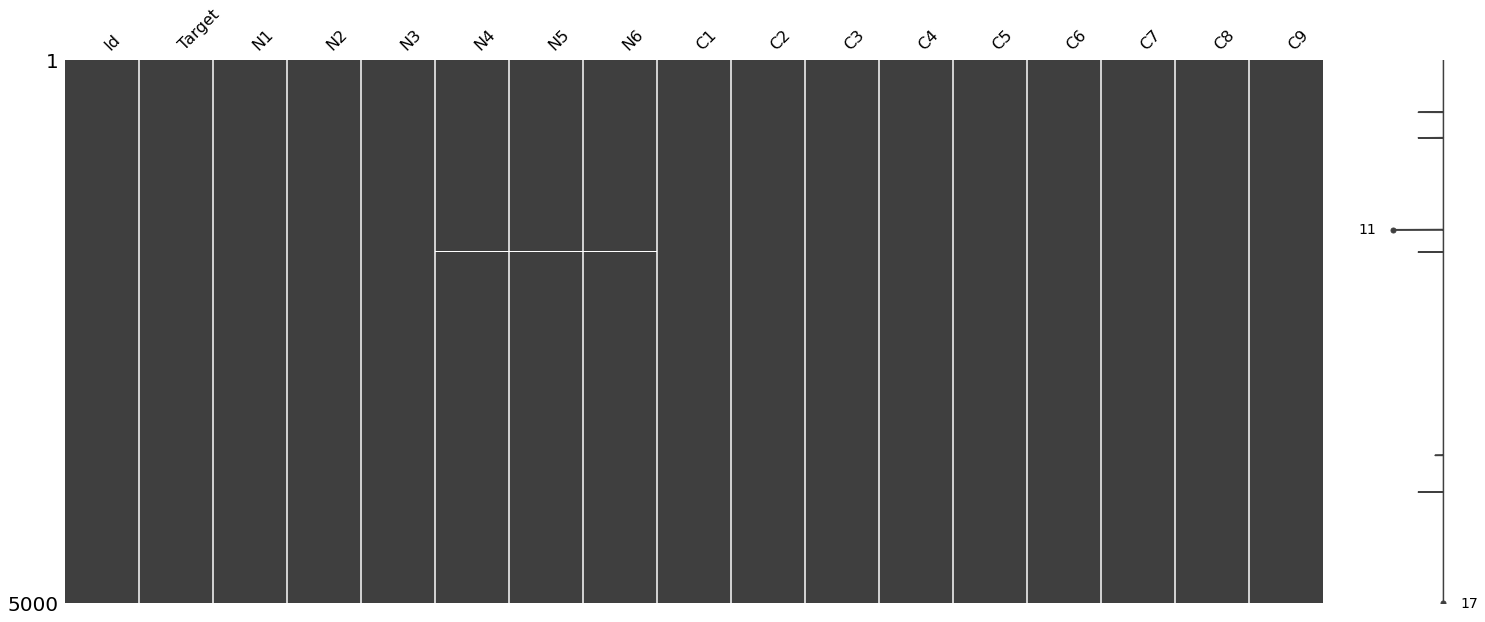

In [5]:
#oh, we have some nulls, but their amount that small that we can just drop them
msno.matrix(train)

In [6]:
train=train.dropna()
print(train['Id'].nunique())
#so we can drop it

4994


In [7]:
train = train.drop(["Id"], axis=1)
#checking dublicates
print('Number of dublicates in train set:', len(train)-len(train.drop_duplicates()))

Number of dublicates in train set: 193


In [8]:
#we do not have many dublicates, so let's drop them
train = train.drop_duplicates()
train

,Target,N1,N2,N3,N4,N5,N6,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,1500000,2056164.384,11,1.8,0.0,9.0,6.0,1,M,F,V,B,S,J,T,D
1,2993000,3572619.048,8,2.5,8.0,6.0,9.0,2,A,F,V,B,S,J,N,1
2,9500000,9813953.488,6,3.5,2.0,9.0,0.0,1,A,B,K,B,S,W,D,D
3,4056000,4529545.455,5,2.5,4.0,6.0,4.0,1,A,F,K,BG,S,4,T,1
4,3543000,3823255.814,10,3.5,1.0,5.0,4.0,1,A,F,K,BG,S,4,T,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2023000,2200000.000,14,2.2,5.0,5.0,5.0,1,M,F,V,D,M,W,D,F
4996,2000000,2265060.241,14,3.0,8.0,2.0,7.0,1,A,F,K,B,S,4,T,1
4997,4040000,4691666.667,11,3.3,3.0,2.0,5.0,2,A,F,K,B,C,J,T,E
4998,1400000,1519047.619,9,1.6,2.0,0.0,7.0,2,M,F,V,BG,S,K,L,1


In [9]:
print('N1:', train['N1'].nunique())
print('N2:', train['N2'].nunique())
print('C9:', train['C9'].nunique())
set1 = set(train['C3'])
set1

N1: 4218
N2: 20
C9: 32


{'A', 'B', 'F'}

In [10]:
set(train['C7'])

{'1',
 '2',
 '3',
 '4',
 '5',
 '6',
 'A',
 'H',
 'J',
 'K',
 'L',
 'M',
 'N',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Z'}

In [11]:
#by the above I decided to label encode C7-C9 and one hot other

le = LabelEncoder()
train['C7']= le.fit_transform(train['C7'])
train['C8']= le.fit_transform(train['C8'])
train['C9']= le.fit_transform(train['C9'])

test['C7']= le.fit_transform(test['C7'])
test['C8']= le.fit_transform(test['C8'])
test['C9']= le.fit_transform(test['C9'])
train

,Target,N1,N2,N3,N4,N5,N6,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,1500000,2056164.384,11,1.8,0.0,9.0,6.0,1,M,F,V,B,S,8,22,11
1,2993000,3572619.048,8,2.5,8.0,6.0,9.0,2,A,F,V,B,S,8,17,1
2,9500000,9813953.488,6,3.5,2.0,9.0,0.0,1,A,B,K,B,S,18,9,11
3,4056000,4529545.455,5,2.5,4.0,6.0,4.0,1,A,F,K,BG,S,3,22,1
4,3543000,3823255.814,10,3.5,1.0,5.0,4.0,1,A,F,K,BG,S,3,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2023000,2200000.000,14,2.2,5.0,5.0,5.0,1,M,F,V,D,M,18,9,13
4996,2000000,2265060.241,14,3.0,8.0,2.0,7.0,1,A,F,K,B,S,3,22,1
4997,4040000,4691666.667,11,3.3,3.0,2.0,5.0,2,A,F,K,B,C,8,22,12
4998,1400000,1519047.619,9,1.6,2.0,0.0,7.0,2,M,F,V,BG,S,9,15,1


In [12]:
#let's encode other cols

train = pd.get_dummies(train)
test = pd.get_dummies(test)
train

,Target,N1,N2,N3,N4,N5,N6,C1,C7,C8,...,C5_D,C5_G,C5_H,C6_C,C6_L,C6_M,C6_P,C6_S,C6_U,C6_V
0,1500000,2056164.384,11,1.8,0.0,9.0,6.0,1,8,22,...,0,0,0,0,0,0,0,1,0,0
1,2993000,3572619.048,8,2.5,8.0,6.0,9.0,2,8,17,...,0,0,0,0,0,0,0,1,0,0
2,9500000,9813953.488,6,3.5,2.0,9.0,0.0,1,18,9,...,0,0,0,0,0,0,0,1,0,0
3,4056000,4529545.455,5,2.5,4.0,6.0,4.0,1,3,22,...,0,0,0,0,0,0,0,1,0,0
4,3543000,3823255.814,10,3.5,1.0,5.0,4.0,1,3,22,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2023000,2200000.000,14,2.2,5.0,5.0,5.0,1,18,9,...,1,0,0,0,0,1,0,0,0,0
4996,2000000,2265060.241,14,3.0,8.0,2.0,7.0,1,3,22,...,0,0,0,0,0,0,0,1,0,0
4997,4040000,4691666.667,11,3.3,3.0,2.0,5.0,2,8,22,...,0,0,0,1,0,0,0,0,0,0
4998,1400000,1519047.619,9,1.6,2.0,0.0,7.0,2,9,15,...,0,0,0,0,0,0,0,1,0,0


### Models

In [13]:
x = train.drop("Target", axis=1)
y = train["Target"]
x_train, x_test , y_train, y_test = train_test_split(x , y , test_size = 0.2,random_state =2021)

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('LSVR',LinearSVR())])))
pipelines.append(('ScaledDTR', Pipeline([('Scaler', StandardScaler()),('DTR', DecisionTreeRegressor())])))
pipelines.append(('ScaledRidge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge())])))
pipelines.append(('ScaledRanFor', Pipeline([('Scaler', StandardScaler()),('RanFor', RandomForestRegressor())])))
pipelines.append(('ScaledBoost', Pipeline([('Scaler', StandardScaler()),('Boost', GradientBoostingRegressor())])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBRegressor())])))
pipelines.append(('ScaledLGB', Pipeline([('Scaler', StandardScaler()),('LGBM', LGBMRegressor())])))
pipelines.append(('ScaledCat', Pipeline([('Scaler', StandardScaler()),('Cat', CatBoostRegressor())])))
pipelines.append(('ScaledBag', Pipeline([('Scaler', StandardScaler()),('Bag', BaggingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=5, random_state=2021, shuffle=True) #I want to check it with k-fold 5
    cv_results = -cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)

ScaledLR: 92171992161.203171
ScaledSVR: 14389937265811.083984
ScaledDTR: 178417953190.104156
ScaledRidge: 92211161667.684311
ScaledRanFor: 94762820837.683075
ScaledBoost: 91964566329.354095
ScaledXGB: 98536658238.300858
ScaledLGB: 126767610173.084595
Learning rate set to 0.047661
0:	learn: 1949037.8711737	total: 179ms	remaining: 2m 58s
1:	learn: 1872314.4006570	total: 188ms	remaining: 1m 33s
2:	learn: 1804145.7339892	total: 197ms	remaining: 1m 5s
3:	learn: 1740229.2014634	total: 205ms	remaining: 51.1s
4:	learn: 1676537.6007378	total: 211ms	remaining: 42s
5:	learn: 1611516.7420838	total: 216ms	remaining: 35.7s
6:	learn: 1552604.6172003	total: 219ms	remaining: 31.1s
7:	learn: 1493766.4363184	total: 223ms	remaining: 27.6s
8:	learn: 1440914.0896301	total: 226ms	remaining: 24.9s
9:	learn: 1387482.1550615	total: 229ms	remaining: 22.6s
10:	learn: 1333597.5117878	total: 231ms	remaining: 20.8s
11:	learn: 1290144.6969990	total: 234ms	remaining: 19.3s
12:	learn: 1247424.0815014	total: 236ms	remai

143:	learn: 250663.0929116	total: 510ms	remaining: 3.03s
144:	learn: 250353.4781132	total: 512ms	remaining: 3.02s
145:	learn: 250006.4320651	total: 514ms	remaining: 3s
146:	learn: 249654.6082380	total: 516ms	remaining: 2.99s
147:	learn: 249082.2634227	total: 518ms	remaining: 2.98s
148:	learn: 248715.0186636	total: 520ms	remaining: 2.97s
149:	learn: 248111.1295622	total: 522ms	remaining: 2.96s
150:	learn: 247657.1160131	total: 524ms	remaining: 2.95s
151:	learn: 247254.4468196	total: 526ms	remaining: 2.94s
152:	learn: 246947.1488883	total: 528ms	remaining: 2.92s
153:	learn: 246456.1656286	total: 530ms	remaining: 2.91s
154:	learn: 246147.6525402	total: 533ms	remaining: 2.9s
155:	learn: 245764.5504755	total: 535ms	remaining: 2.9s
156:	learn: 245550.1541152	total: 538ms	remaining: 2.89s
157:	learn: 245319.0998797	total: 540ms	remaining: 2.88s
158:	learn: 245048.5925466	total: 542ms	remaining: 2.87s
159:	learn: 244836.2322442	total: 544ms	remaining: 2.86s
160:	learn: 244372.8394897	total: 54

364:	learn: 202481.5540763	total: 1.01s	remaining: 1.75s
365:	learn: 202303.0391507	total: 1.01s	remaining: 1.75s
366:	learn: 202240.7410516	total: 1.01s	remaining: 1.74s
367:	learn: 202044.6149439	total: 1.01s	remaining: 1.74s
368:	learn: 201738.7243584	total: 1.01s	remaining: 1.74s
369:	learn: 201591.7598359	total: 1.02s	remaining: 1.73s
370:	learn: 201425.8824687	total: 1.02s	remaining: 1.73s
371:	learn: 201233.3938489	total: 1.02s	remaining: 1.73s
372:	learn: 201030.1551240	total: 1.02s	remaining: 1.72s
373:	learn: 200835.5439993	total: 1.03s	remaining: 1.72s
374:	learn: 200699.4102434	total: 1.03s	remaining: 1.71s
375:	learn: 200503.5177004	total: 1.03s	remaining: 1.71s
376:	learn: 200358.9456526	total: 1.03s	remaining: 1.71s
377:	learn: 200186.6682762	total: 1.03s	remaining: 1.7s
378:	learn: 200056.1300597	total: 1.04s	remaining: 1.7s
379:	learn: 199878.0820514	total: 1.04s	remaining: 1.7s
380:	learn: 199793.3132621	total: 1.04s	remaining: 1.69s
381:	learn: 199658.8428317	total: 

515:	learn: 181555.1770241	total: 1.34s	remaining: 1.26s
516:	learn: 181436.6424957	total: 1.35s	remaining: 1.26s
517:	learn: 181353.4280046	total: 1.35s	remaining: 1.25s
518:	learn: 181244.3094876	total: 1.35s	remaining: 1.25s
519:	learn: 181108.9192480	total: 1.35s	remaining: 1.25s
520:	learn: 180962.6134448	total: 1.35s	remaining: 1.25s
521:	learn: 180809.0308263	total: 1.36s	remaining: 1.24s
522:	learn: 180738.7963350	total: 1.36s	remaining: 1.24s
523:	learn: 180616.0600763	total: 1.36s	remaining: 1.24s
524:	learn: 180511.8363111	total: 1.36s	remaining: 1.23s
525:	learn: 180329.0232713	total: 1.36s	remaining: 1.23s
526:	learn: 180200.2053796	total: 1.37s	remaining: 1.23s
527:	learn: 180057.3650280	total: 1.37s	remaining: 1.22s
528:	learn: 180016.8131720	total: 1.37s	remaining: 1.22s
529:	learn: 179857.4329180	total: 1.37s	remaining: 1.22s
530:	learn: 179744.5073776	total: 1.38s	remaining: 1.22s
531:	learn: 179607.5942691	total: 1.38s	remaining: 1.21s
532:	learn: 179519.7130201	tota

666:	learn: 164939.4490236	total: 1.68s	remaining: 839ms
667:	learn: 164831.1091204	total: 1.68s	remaining: 836ms
668:	learn: 164718.9935969	total: 1.68s	remaining: 834ms
669:	learn: 164613.6016866	total: 1.69s	remaining: 831ms
670:	learn: 164507.1611055	total: 1.69s	remaining: 828ms
671:	learn: 164399.8874612	total: 1.69s	remaining: 826ms
672:	learn: 164244.5968693	total: 1.69s	remaining: 823ms
673:	learn: 164070.7404880	total: 1.7s	remaining: 820ms
674:	learn: 163965.8072779	total: 1.7s	remaining: 818ms
675:	learn: 163895.4819891	total: 1.7s	remaining: 815ms
676:	learn: 163845.5215188	total: 1.7s	remaining: 812ms
677:	learn: 163734.1868896	total: 1.7s	remaining: 809ms
678:	learn: 163662.8246546	total: 1.71s	remaining: 807ms
679:	learn: 163562.1244674	total: 1.71s	remaining: 804ms
680:	learn: 163450.7415003	total: 1.71s	remaining: 801ms
681:	learn: 163326.6086036	total: 1.71s	remaining: 799ms
682:	learn: 163228.4793586	total: 1.72s	remaining: 796ms
683:	learn: 163142.5340641	total: 1.

876:	learn: 146632.8952103	total: 2.18s	remaining: 306ms
877:	learn: 146536.3225042	total: 2.19s	remaining: 304ms
878:	learn: 146476.1678617	total: 2.19s	remaining: 301ms
879:	learn: 146341.0779777	total: 2.19s	remaining: 299ms
880:	learn: 146244.7099434	total: 2.19s	remaining: 296ms
881:	learn: 146164.8432322	total: 2.19s	remaining: 294ms
882:	learn: 146103.0913244	total: 2.2s	remaining: 291ms
883:	learn: 145979.3936036	total: 2.2s	remaining: 289ms
884:	learn: 145911.4318884	total: 2.2s	remaining: 286ms
885:	learn: 145821.1145672	total: 2.2s	remaining: 284ms
886:	learn: 145731.5374716	total: 2.21s	remaining: 281ms
887:	learn: 145665.7655602	total: 2.21s	remaining: 279ms
888:	learn: 145608.1075859	total: 2.21s	remaining: 276ms
889:	learn: 145558.5302482	total: 2.21s	remaining: 273ms
890:	learn: 145467.7292049	total: 2.21s	remaining: 271ms
891:	learn: 145375.9474313	total: 2.22s	remaining: 268ms
892:	learn: 145250.4437743	total: 2.22s	remaining: 266ms
893:	learn: 145204.7996132	total: 2

79:	learn: 315400.2562144	total: 164ms	remaining: 1.89s
80:	learn: 313576.3199443	total: 166ms	remaining: 1.89s
81:	learn: 311815.6240047	total: 169ms	remaining: 1.89s
82:	learn: 309870.3495301	total: 171ms	remaining: 1.89s
83:	learn: 308008.8005311	total: 173ms	remaining: 1.89s
84:	learn: 306561.5466318	total: 175ms	remaining: 1.89s
85:	learn: 304963.1018763	total: 177ms	remaining: 1.88s
86:	learn: 303562.0722019	total: 180ms	remaining: 1.89s
87:	learn: 302171.4041265	total: 182ms	remaining: 1.89s
88:	learn: 300671.3312144	total: 184ms	remaining: 1.89s
89:	learn: 299101.5368780	total: 186ms	remaining: 1.88s
90:	learn: 297918.1741233	total: 188ms	remaining: 1.88s
91:	learn: 296787.3964352	total: 190ms	remaining: 1.88s
92:	learn: 295591.9895224	total: 192ms	remaining: 1.88s
93:	learn: 294805.0259652	total: 194ms	remaining: 1.87s
94:	learn: 293608.7161707	total: 196ms	remaining: 1.87s
95:	learn: 292665.0396672	total: 198ms	remaining: 1.87s
96:	learn: 291678.2351951	total: 200ms	remaining

242:	learn: 230238.4779459	total: 498ms	remaining: 1.55s
243:	learn: 229951.5291287	total: 500ms	remaining: 1.55s
244:	learn: 229766.3251721	total: 502ms	remaining: 1.55s
245:	learn: 229547.9224834	total: 504ms	remaining: 1.55s
246:	learn: 229372.6392662	total: 506ms	remaining: 1.54s
247:	learn: 229223.1087274	total: 509ms	remaining: 1.54s
248:	learn: 229130.3910779	total: 511ms	remaining: 1.54s
249:	learn: 228977.0687028	total: 513ms	remaining: 1.54s
250:	learn: 228824.2354637	total: 515ms	remaining: 1.54s
251:	learn: 228621.0217989	total: 518ms	remaining: 1.54s
252:	learn: 228325.9031263	total: 520ms	remaining: 1.53s
253:	learn: 228157.4567450	total: 522ms	remaining: 1.53s
254:	learn: 227895.3863528	total: 524ms	remaining: 1.53s
255:	learn: 227664.5621895	total: 526ms	remaining: 1.53s
256:	learn: 227475.7581169	total: 528ms	remaining: 1.52s
257:	learn: 227308.7901497	total: 530ms	remaining: 1.52s
258:	learn: 227135.1582523	total: 532ms	remaining: 1.52s
259:	learn: 227029.4045483	tota

405:	learn: 203921.3615108	total: 831ms	remaining: 1.22s
406:	learn: 203766.9043727	total: 833ms	remaining: 1.21s
407:	learn: 203597.9040047	total: 836ms	remaining: 1.21s
408:	learn: 203471.7005585	total: 838ms	remaining: 1.21s
409:	learn: 203397.2424195	total: 840ms	remaining: 1.21s
410:	learn: 203250.7153308	total: 843ms	remaining: 1.21s
411:	learn: 203089.3265251	total: 846ms	remaining: 1.21s
412:	learn: 203027.0247041	total: 849ms	remaining: 1.21s
413:	learn: 202922.1350781	total: 851ms	remaining: 1.2s
414:	learn: 202758.7653677	total: 853ms	remaining: 1.2s
415:	learn: 202510.1187874	total: 856ms	remaining: 1.2s
416:	learn: 202287.2771496	total: 858ms	remaining: 1.2s
417:	learn: 202146.1756905	total: 860ms	remaining: 1.2s
418:	learn: 202008.9883665	total: 863ms	remaining: 1.2s
419:	learn: 201873.1275508	total: 865ms	remaining: 1.19s
420:	learn: 201756.5706556	total: 867ms	remaining: 1.19s
421:	learn: 201570.1528900	total: 870ms	remaining: 1.19s
422:	learn: 201351.9937993	total: 872

624:	learn: 176547.1794933	total: 1.33s	remaining: 801ms
625:	learn: 176501.0836509	total: 1.34s	remaining: 799ms
626:	learn: 176388.5837870	total: 1.34s	remaining: 797ms
627:	learn: 176237.7601847	total: 1.34s	remaining: 795ms
628:	learn: 176092.6453905	total: 1.34s	remaining: 792ms
629:	learn: 176000.4094259	total: 1.34s	remaining: 790ms
630:	learn: 175865.6777022	total: 1.35s	remaining: 788ms
631:	learn: 175802.2112631	total: 1.35s	remaining: 786ms
632:	learn: 175712.7200330	total: 1.35s	remaining: 784ms
633:	learn: 175632.9676615	total: 1.35s	remaining: 782ms
634:	learn: 175545.3058994	total: 1.36s	remaining: 780ms
635:	learn: 175470.6376275	total: 1.36s	remaining: 777ms
636:	learn: 175398.0395164	total: 1.36s	remaining: 775ms
637:	learn: 175286.6101682	total: 1.36s	remaining: 773ms
638:	learn: 175198.8499222	total: 1.36s	remaining: 771ms
639:	learn: 175049.1663747	total: 1.37s	remaining: 769ms
640:	learn: 174970.2804923	total: 1.37s	remaining: 767ms
641:	learn: 174782.8807829	tota

786:	learn: 161124.2180029	total: 1.67s	remaining: 452ms
787:	learn: 161068.3704651	total: 1.67s	remaining: 450ms
788:	learn: 160917.3783474	total: 1.67s	remaining: 447ms
789:	learn: 160843.1613223	total: 1.68s	remaining: 445ms
790:	learn: 160789.0469811	total: 1.68s	remaining: 443ms
791:	learn: 160709.3768559	total: 1.68s	remaining: 441ms
792:	learn: 160621.4806486	total: 1.68s	remaining: 439ms
793:	learn: 160582.2600759	total: 1.68s	remaining: 437ms
794:	learn: 160419.5614973	total: 1.69s	remaining: 435ms
795:	learn: 160341.8077898	total: 1.69s	remaining: 433ms
796:	learn: 160281.1113571	total: 1.69s	remaining: 431ms
797:	learn: 160187.4728825	total: 1.69s	remaining: 428ms
798:	learn: 160099.9480081	total: 1.69s	remaining: 426ms
799:	learn: 159985.8594773	total: 1.7s	remaining: 424ms
800:	learn: 159941.7303868	total: 1.7s	remaining: 422ms
801:	learn: 159897.1834424	total: 1.7s	remaining: 420ms
802:	learn: 159830.2782962	total: 1.7s	remaining: 418ms
803:	learn: 159738.5064346	total: 1

945:	learn: 148526.0261942	total: 2s	remaining: 114ms
946:	learn: 148451.0056739	total: 2s	remaining: 112ms
947:	learn: 148406.4683945	total: 2s	remaining: 110ms
948:	learn: 148324.0340711	total: 2.01s	remaining: 108ms
949:	learn: 148252.6518292	total: 2.01s	remaining: 106ms
950:	learn: 148200.9619747	total: 2.01s	remaining: 104ms
951:	learn: 148120.2601311	total: 2.01s	remaining: 102ms
952:	learn: 148073.6708249	total: 2.02s	remaining: 99.4ms
953:	learn: 148008.8411656	total: 2.02s	remaining: 97.3ms
954:	learn: 147947.6484156	total: 2.02s	remaining: 95.2ms
955:	learn: 147869.5938957	total: 2.02s	remaining: 93.1ms
956:	learn: 147795.5354016	total: 2.02s	remaining: 91ms
957:	learn: 147681.9765991	total: 2.03s	remaining: 88.8ms
958:	learn: 147577.9550693	total: 2.03s	remaining: 86.7ms
959:	learn: 147501.1048245	total: 2.03s	remaining: 84.6ms
960:	learn: 147412.4322030	total: 2.03s	remaining: 82.5ms
961:	learn: 147368.1298935	total: 2.04s	remaining: 80.4ms
962:	learn: 147326.8263343	total

147:	learn: 245414.9664253	total: 335ms	remaining: 1.93s
148:	learn: 245020.9932569	total: 338ms	remaining: 1.93s
149:	learn: 244654.8797578	total: 340ms	remaining: 1.93s
150:	learn: 244304.0793882	total: 342ms	remaining: 1.92s
151:	learn: 244088.4239781	total: 344ms	remaining: 1.92s
152:	learn: 243624.5026441	total: 346ms	remaining: 1.92s
153:	learn: 243311.8328955	total: 348ms	remaining: 1.91s
154:	learn: 243068.0757380	total: 350ms	remaining: 1.91s
155:	learn: 242781.0664031	total: 353ms	remaining: 1.91s
156:	learn: 242562.5637783	total: 355ms	remaining: 1.91s
157:	learn: 242304.0932273	total: 357ms	remaining: 1.9s
158:	learn: 241911.7482542	total: 359ms	remaining: 1.9s
159:	learn: 241508.4181963	total: 361ms	remaining: 1.9s
160:	learn: 241171.8495727	total: 363ms	remaining: 1.89s
161:	learn: 240708.6724742	total: 365ms	remaining: 1.89s
162:	learn: 240443.7865107	total: 367ms	remaining: 1.89s
163:	learn: 240169.4194326	total: 370ms	remaining: 1.89s
164:	learn: 240061.0346261	total: 

308:	learn: 210240.4246703	total: 672ms	remaining: 1.5s
309:	learn: 209990.1097531	total: 674ms	remaining: 1.5s
310:	learn: 209915.6103734	total: 677ms	remaining: 1.5s
311:	learn: 209680.2008468	total: 679ms	remaining: 1.5s
312:	learn: 209582.0963127	total: 681ms	remaining: 1.49s
313:	learn: 209520.5575683	total: 683ms	remaining: 1.49s
314:	learn: 209344.3772999	total: 685ms	remaining: 1.49s
315:	learn: 209170.5015264	total: 687ms	remaining: 1.49s
316:	learn: 209006.1297678	total: 689ms	remaining: 1.49s
317:	learn: 208894.1550739	total: 692ms	remaining: 1.48s
318:	learn: 208740.7597352	total: 694ms	remaining: 1.48s
319:	learn: 208548.4460037	total: 696ms	remaining: 1.48s
320:	learn: 208349.9060310	total: 698ms	remaining: 1.48s
321:	learn: 208228.9690415	total: 700ms	remaining: 1.47s
322:	learn: 208158.8918859	total: 702ms	remaining: 1.47s
323:	learn: 207876.5514343	total: 704ms	remaining: 1.47s
324:	learn: 207707.5792182	total: 706ms	remaining: 1.47s
325:	learn: 207602.4504611	total: 7

467:	learn: 187813.6646594	total: 1s	remaining: 1.14s
468:	learn: 187747.8715221	total: 1.01s	remaining: 1.14s
469:	learn: 187649.6925825	total: 1.01s	remaining: 1.14s
470:	learn: 187506.6402846	total: 1.01s	remaining: 1.14s
471:	learn: 187352.1277978	total: 1.01s	remaining: 1.14s
472:	learn: 187240.3406378	total: 1.02s	remaining: 1.13s
473:	learn: 187119.9691676	total: 1.02s	remaining: 1.13s
474:	learn: 186928.0796666	total: 1.02s	remaining: 1.13s
475:	learn: 186785.2653400	total: 1.02s	remaining: 1.13s
476:	learn: 186707.1223615	total: 1.02s	remaining: 1.12s
477:	learn: 186402.8892085	total: 1.03s	remaining: 1.12s
478:	learn: 186263.8839729	total: 1.03s	remaining: 1.12s
479:	learn: 186125.0649519	total: 1.03s	remaining: 1.12s
480:	learn: 186049.2615157	total: 1.03s	remaining: 1.12s
481:	learn: 185927.4238887	total: 1.04s	remaining: 1.11s
482:	learn: 185817.0708196	total: 1.04s	remaining: 1.11s
483:	learn: 185666.3609515	total: 1.04s	remaining: 1.11s
484:	learn: 185532.7820451	total: 

617:	learn: 170195.1222144	total: 1.34s	remaining: 827ms
618:	learn: 169961.4675489	total: 1.34s	remaining: 825ms
619:	learn: 169894.9563461	total: 1.34s	remaining: 823ms
620:	learn: 169753.7343971	total: 1.34s	remaining: 821ms
621:	learn: 169652.9185942	total: 1.35s	remaining: 819ms
622:	learn: 169556.2845749	total: 1.35s	remaining: 817ms
623:	learn: 169463.0315060	total: 1.35s	remaining: 815ms
624:	learn: 169353.7463626	total: 1.35s	remaining: 813ms
625:	learn: 169303.7289815	total: 1.36s	remaining: 810ms
626:	learn: 169184.0768051	total: 1.36s	remaining: 808ms
627:	learn: 169079.5669452	total: 1.36s	remaining: 806ms
628:	learn: 168971.5204511	total: 1.36s	remaining: 804ms
629:	learn: 168881.6240794	total: 1.36s	remaining: 801ms
630:	learn: 168790.7079159	total: 1.37s	remaining: 799ms
631:	learn: 168614.4798820	total: 1.37s	remaining: 797ms
632:	learn: 168509.2896567	total: 1.37s	remaining: 795ms
633:	learn: 168389.7821202	total: 1.37s	remaining: 792ms
634:	learn: 168229.1776615	tota

774:	learn: 154873.6833117	total: 1.67s	remaining: 486ms
775:	learn: 154803.8091367	total: 1.68s	remaining: 484ms
776:	learn: 154728.2255812	total: 1.68s	remaining: 482ms
777:	learn: 154664.6014175	total: 1.68s	remaining: 480ms
778:	learn: 154600.2192067	total: 1.68s	remaining: 478ms
779:	learn: 154496.3179013	total: 1.69s	remaining: 475ms
780:	learn: 154441.0950588	total: 1.69s	remaining: 473ms
781:	learn: 154325.9168099	total: 1.69s	remaining: 471ms
782:	learn: 154210.2051039	total: 1.69s	remaining: 469ms
783:	learn: 154128.5552610	total: 1.7s	remaining: 467ms
784:	learn: 154079.4617226	total: 1.7s	remaining: 465ms
785:	learn: 154002.9760731	total: 1.7s	remaining: 463ms
786:	learn: 153871.1729754	total: 1.7s	remaining: 461ms
787:	learn: 153814.3308786	total: 1.7s	remaining: 458ms
788:	learn: 153743.7918565	total: 1.71s	remaining: 456ms
789:	learn: 153668.9302339	total: 1.71s	remaining: 454ms
790:	learn: 153576.0344313	total: 1.71s	remaining: 452ms
791:	learn: 153506.1981698	total: 1.

922:	learn: 143409.8155039	total: 2.01s	remaining: 168ms
923:	learn: 143336.3420419	total: 2.01s	remaining: 165ms
924:	learn: 143294.6041196	total: 2.01s	remaining: 163ms
925:	learn: 143225.4253348	total: 2.01s	remaining: 161ms
926:	learn: 143191.1105872	total: 2.02s	remaining: 159ms
927:	learn: 143047.0466594	total: 2.02s	remaining: 157ms
928:	learn: 142993.3092292	total: 2.02s	remaining: 154ms
929:	learn: 142924.4659545	total: 2.02s	remaining: 152ms
930:	learn: 142858.0906042	total: 2.03s	remaining: 150ms
931:	learn: 142792.7780692	total: 2.03s	remaining: 148ms
932:	learn: 142729.8034463	total: 2.03s	remaining: 146ms
933:	learn: 142685.4462427	total: 2.03s	remaining: 144ms
934:	learn: 142576.6323392	total: 2.03s	remaining: 141ms
935:	learn: 142520.8303684	total: 2.04s	remaining: 139ms
936:	learn: 142473.7331106	total: 2.04s	remaining: 137ms
937:	learn: 142374.8147212	total: 2.04s	remaining: 135ms
938:	learn: 142281.6891310	total: 2.04s	remaining: 133ms
939:	learn: 142203.7523759	tota

78:	learn: 310543.2276837	total: 165ms	remaining: 1.92s
79:	learn: 308791.1207063	total: 167ms	remaining: 1.92s
80:	learn: 307022.0586555	total: 169ms	remaining: 1.92s
81:	learn: 305367.2269378	total: 171ms	remaining: 1.91s
82:	learn: 303888.8854403	total: 173ms	remaining: 1.91s
83:	learn: 302135.1512312	total: 175ms	remaining: 1.91s
84:	learn: 300381.6465318	total: 177ms	remaining: 1.91s
85:	learn: 298799.7763848	total: 180ms	remaining: 1.91s
86:	learn: 297296.2881121	total: 182ms	remaining: 1.91s
87:	learn: 296373.9759530	total: 184ms	remaining: 1.91s
88:	learn: 295162.9103315	total: 186ms	remaining: 1.9s
89:	learn: 293779.1651354	total: 188ms	remaining: 1.9s
90:	learn: 292220.5921381	total: 190ms	remaining: 1.9s
91:	learn: 290887.4735200	total: 192ms	remaining: 1.89s
92:	learn: 289424.6043235	total: 194ms	remaining: 1.89s
93:	learn: 288192.8928700	total: 196ms	remaining: 1.89s
94:	learn: 287159.8830762	total: 198ms	remaining: 1.88s
95:	learn: 286184.8029892	total: 200ms	remaining: 1

243:	learn: 226481.5738825	total: 498ms	remaining: 1.54s
244:	learn: 226250.1471438	total: 500ms	remaining: 1.54s
245:	learn: 225975.3629017	total: 502ms	remaining: 1.54s
246:	learn: 225797.8896550	total: 504ms	remaining: 1.54s
247:	learn: 225626.5260263	total: 506ms	remaining: 1.53s
248:	learn: 225421.8297531	total: 508ms	remaining: 1.53s
249:	learn: 225184.0483439	total: 511ms	remaining: 1.53s
250:	learn: 225035.0753067	total: 513ms	remaining: 1.53s
251:	learn: 224771.5741165	total: 515ms	remaining: 1.53s
252:	learn: 224579.7742096	total: 517ms	remaining: 1.53s
253:	learn: 224404.1571908	total: 519ms	remaining: 1.52s
254:	learn: 224227.3099430	total: 521ms	remaining: 1.52s
255:	learn: 223999.6940523	total: 523ms	remaining: 1.52s
256:	learn: 223769.5975855	total: 525ms	remaining: 1.52s
257:	learn: 223506.6427661	total: 527ms	remaining: 1.52s
258:	learn: 223285.5876319	total: 529ms	remaining: 1.51s
259:	learn: 223080.3378093	total: 531ms	remaining: 1.51s
260:	learn: 222904.7483143	tota

409:	learn: 198468.2280196	total: 834ms	remaining: 1.2s
410:	learn: 198335.8408430	total: 836ms	remaining: 1.2s
411:	learn: 198199.0349431	total: 838ms	remaining: 1.2s
412:	learn: 198091.8370613	total: 840ms	remaining: 1.19s
413:	learn: 197977.6568740	total: 843ms	remaining: 1.19s
414:	learn: 197949.5221436	total: 845ms	remaining: 1.19s
415:	learn: 197770.7079051	total: 847ms	remaining: 1.19s
416:	learn: 197634.7036025	total: 849ms	remaining: 1.19s
417:	learn: 197381.5462689	total: 852ms	remaining: 1.19s
418:	learn: 197249.6101957	total: 854ms	remaining: 1.18s
419:	learn: 197127.8784030	total: 856ms	remaining: 1.18s
420:	learn: 196966.8254989	total: 858ms	remaining: 1.18s
421:	learn: 196935.0076023	total: 860ms	remaining: 1.18s
422:	learn: 196707.0228788	total: 862ms	remaining: 1.18s
423:	learn: 196632.1560268	total: 865ms	remaining: 1.17s
424:	learn: 196604.6484000	total: 867ms	remaining: 1.17s
425:	learn: 196444.6239319	total: 869ms	remaining: 1.17s
426:	learn: 196103.7943392	total: 

571:	learn: 178336.9110924	total: 1.17s	remaining: 873ms
572:	learn: 178167.4751942	total: 1.17s	remaining: 871ms
573:	learn: 178036.2529729	total: 1.17s	remaining: 869ms
574:	learn: 178022.1980660	total: 1.17s	remaining: 867ms
575:	learn: 177963.0896903	total: 1.17s	remaining: 865ms
576:	learn: 177878.0641136	total: 1.18s	remaining: 863ms
577:	learn: 177763.0286730	total: 1.18s	remaining: 861ms
578:	learn: 177664.5663257	total: 1.18s	remaining: 859ms
579:	learn: 177553.9136473	total: 1.18s	remaining: 857ms
580:	learn: 177420.5417659	total: 1.19s	remaining: 855ms
581:	learn: 177311.4815890	total: 1.19s	remaining: 853ms
582:	learn: 177151.9507245	total: 1.19s	remaining: 851ms
583:	learn: 177073.1982668	total: 1.19s	remaining: 849ms
584:	learn: 176991.9116337	total: 1.19s	remaining: 847ms
585:	learn: 176859.2934946	total: 1.2s	remaining: 845ms
586:	learn: 176795.2897322	total: 1.2s	remaining: 843ms
587:	learn: 176627.9706452	total: 1.2s	remaining: 841ms
588:	learn: 176485.8156998	total: 

732:	learn: 161898.3463385	total: 1.5s	remaining: 547ms
733:	learn: 161798.4435067	total: 1.5s	remaining: 545ms
734:	learn: 161721.6027571	total: 1.5s	remaining: 543ms
735:	learn: 161652.0489250	total: 1.51s	remaining: 541ms
736:	learn: 161564.4489719	total: 1.51s	remaining: 538ms
737:	learn: 161470.7923623	total: 1.51s	remaining: 536ms
738:	learn: 161384.3225443	total: 1.51s	remaining: 534ms
739:	learn: 161246.4577646	total: 1.51s	remaining: 532ms
740:	learn: 161170.1553312	total: 1.52s	remaining: 531ms
741:	learn: 161099.6588289	total: 1.52s	remaining: 529ms
742:	learn: 161008.8570994	total: 1.52s	remaining: 526ms
743:	learn: 160844.9460588	total: 1.52s	remaining: 524ms
744:	learn: 160788.3143895	total: 1.52s	remaining: 522ms
745:	learn: 160740.7555709	total: 1.53s	remaining: 520ms
746:	learn: 160730.1405349	total: 1.53s	remaining: 518ms
747:	learn: 160613.0030448	total: 1.53s	remaining: 516ms
748:	learn: 160513.3669829	total: 1.53s	remaining: 514ms
749:	learn: 160423.3559766	total: 

897:	learn: 148765.6587795	total: 1.83s	remaining: 208ms
898:	learn: 148674.5456647	total: 1.84s	remaining: 206ms
899:	learn: 148585.6307232	total: 1.84s	remaining: 204ms
900:	learn: 148481.5147190	total: 1.84s	remaining: 202ms
901:	learn: 148385.4246935	total: 1.84s	remaining: 200ms
902:	learn: 148293.8410257	total: 1.84s	remaining: 198ms
903:	learn: 148214.7281977	total: 1.85s	remaining: 196ms
904:	learn: 148129.9509929	total: 1.85s	remaining: 194ms
905:	learn: 148046.4853836	total: 1.85s	remaining: 192ms
906:	learn: 147978.7322092	total: 1.85s	remaining: 190ms
907:	learn: 147919.4413875	total: 1.85s	remaining: 188ms
908:	learn: 147843.5540211	total: 1.86s	remaining: 186ms
909:	learn: 147754.6926870	total: 1.86s	remaining: 184ms
910:	learn: 147681.5954574	total: 1.86s	remaining: 182ms
911:	learn: 147610.8227534	total: 1.86s	remaining: 180ms
912:	learn: 147530.6831659	total: 1.86s	remaining: 178ms
913:	learn: 147483.4687674	total: 1.87s	remaining: 176ms
914:	learn: 147392.1662865	tota

102:	learn: 284591.6890602	total: 245ms	remaining: 2.13s
103:	learn: 283515.9894474	total: 247ms	remaining: 2.13s
104:	learn: 282766.3115325	total: 249ms	remaining: 2.12s
105:	learn: 281832.3754385	total: 251ms	remaining: 2.12s
106:	learn: 281003.2183562	total: 253ms	remaining: 2.11s
107:	learn: 280234.7327804	total: 255ms	remaining: 2.11s
108:	learn: 279443.1157573	total: 257ms	remaining: 2.1s
109:	learn: 278314.8741324	total: 259ms	remaining: 2.1s
110:	learn: 277498.4070025	total: 262ms	remaining: 2.1s
111:	learn: 276996.3403467	total: 264ms	remaining: 2.09s
112:	learn: 276440.3689689	total: 266ms	remaining: 2.09s
113:	learn: 275573.6161807	total: 268ms	remaining: 2.08s
114:	learn: 275014.8903528	total: 270ms	remaining: 2.08s
115:	learn: 274449.3124611	total: 272ms	remaining: 2.07s
116:	learn: 273509.0112304	total: 274ms	remaining: 2.07s
117:	learn: 273100.2188405	total: 276ms	remaining: 2.06s
118:	learn: 272750.2713284	total: 278ms	remaining: 2.06s
119:	learn: 272304.8871573	total: 

269:	learn: 227077.1619811	total: 579ms	remaining: 1.56s
270:	learn: 226872.3209940	total: 581ms	remaining: 1.56s
271:	learn: 226702.4276227	total: 583ms	remaining: 1.56s
272:	learn: 226390.5076703	total: 585ms	remaining: 1.56s
273:	learn: 226267.7914958	total: 587ms	remaining: 1.55s
274:	learn: 226069.9244257	total: 589ms	remaining: 1.55s
275:	learn: 225774.5295442	total: 591ms	remaining: 1.55s
276:	learn: 225561.3570267	total: 594ms	remaining: 1.55s
277:	learn: 225275.6904071	total: 596ms	remaining: 1.55s
278:	learn: 225214.2643917	total: 598ms	remaining: 1.54s
279:	learn: 225105.8991713	total: 600ms	remaining: 1.54s
280:	learn: 225008.6013005	total: 602ms	remaining: 1.54s
281:	learn: 224771.8730154	total: 604ms	remaining: 1.54s
282:	learn: 224577.4868866	total: 606ms	remaining: 1.53s
283:	learn: 224353.2008369	total: 608ms	remaining: 1.53s
284:	learn: 224058.8897531	total: 610ms	remaining: 1.53s
285:	learn: 223850.1351680	total: 612ms	remaining: 1.53s
286:	learn: 223673.5652293	tota

431:	learn: 198879.9462699	total: 911ms	remaining: 1.2s
432:	learn: 198814.6929192	total: 914ms	remaining: 1.2s
433:	learn: 198687.8197783	total: 916ms	remaining: 1.19s
434:	learn: 198600.0651715	total: 918ms	remaining: 1.19s
435:	learn: 198539.8864416	total: 920ms	remaining: 1.19s
436:	learn: 198438.2534859	total: 922ms	remaining: 1.19s
437:	learn: 198351.9112016	total: 924ms	remaining: 1.19s
438:	learn: 198200.2767214	total: 926ms	remaining: 1.18s
439:	learn: 198054.0222456	total: 929ms	remaining: 1.18s
440:	learn: 197823.5838598	total: 931ms	remaining: 1.18s
441:	learn: 197725.7952029	total: 933ms	remaining: 1.18s
442:	learn: 197645.4588087	total: 935ms	remaining: 1.18s
443:	learn: 197580.4658933	total: 937ms	remaining: 1.17s
444:	learn: 197442.2601287	total: 939ms	remaining: 1.17s
445:	learn: 197328.5985372	total: 941ms	remaining: 1.17s
446:	learn: 197186.0513048	total: 943ms	remaining: 1.17s
447:	learn: 196993.7177072	total: 945ms	remaining: 1.16s
448:	learn: 196880.5670649	total:

596:	learn: 178533.3479915	total: 1.25s	remaining: 841ms
597:	learn: 178437.3634331	total: 1.25s	remaining: 839ms
598:	learn: 178316.1661853	total: 1.25s	remaining: 837ms
599:	learn: 178167.1392512	total: 1.25s	remaining: 835ms
600:	learn: 178086.8879593	total: 1.25s	remaining: 833ms
601:	learn: 177969.6937965	total: 1.26s	remaining: 830ms
602:	learn: 177851.6129693	total: 1.26s	remaining: 828ms
603:	learn: 177782.4395438	total: 1.26s	remaining: 826ms
604:	learn: 177733.9032953	total: 1.26s	remaining: 824ms
605:	learn: 177616.8866243	total: 1.26s	remaining: 822ms
606:	learn: 177533.7684570	total: 1.27s	remaining: 820ms
607:	learn: 177441.2873092	total: 1.27s	remaining: 818ms
608:	learn: 177286.9491048	total: 1.27s	remaining: 816ms
609:	learn: 177222.8283015	total: 1.27s	remaining: 814ms
610:	learn: 177074.5507002	total: 1.27s	remaining: 812ms
611:	learn: 176940.4319242	total: 1.28s	remaining: 810ms
612:	learn: 176800.6592034	total: 1.28s	remaining: 808ms
613:	learn: 176672.8070855	tota

756:	learn: 162005.4187400	total: 1.58s	remaining: 507ms
757:	learn: 161887.8489498	total: 1.58s	remaining: 505ms
758:	learn: 161842.4249160	total: 1.58s	remaining: 503ms
759:	learn: 161751.6083427	total: 1.58s	remaining: 501ms
760:	learn: 161606.0592066	total: 1.59s	remaining: 499ms
761:	learn: 161558.5104129	total: 1.59s	remaining: 497ms
762:	learn: 161458.4078718	total: 1.59s	remaining: 495ms
763:	learn: 161374.5009112	total: 1.59s	remaining: 493ms
764:	learn: 161253.7861656	total: 1.6s	remaining: 491ms
765:	learn: 161204.2129836	total: 1.6s	remaining: 489ms
766:	learn: 161094.2658853	total: 1.6s	remaining: 487ms
767:	learn: 161000.3757515	total: 1.6s	remaining: 484ms
768:	learn: 160919.1743665	total: 1.61s	remaining: 482ms
769:	learn: 160847.3485734	total: 1.61s	remaining: 481ms
770:	learn: 160747.7492670	total: 1.61s	remaining: 480ms
771:	learn: 160681.7568213	total: 1.62s	remaining: 478ms
772:	learn: 160582.8119287	total: 1.62s	remaining: 477ms
773:	learn: 160461.2549265	total: 1

907:	learn: 148836.0584013	total: 1.91s	remaining: 193ms
908:	learn: 148758.0659661	total: 1.91s	remaining: 191ms
909:	learn: 148668.8512936	total: 1.91s	remaining: 189ms
910:	learn: 148600.1047782	total: 1.91s	remaining: 187ms
911:	learn: 148533.9997498	total: 1.92s	remaining: 185ms
912:	learn: 148402.6882358	total: 1.92s	remaining: 183ms
913:	learn: 148346.4851232	total: 1.92s	remaining: 181ms
914:	learn: 148309.9122297	total: 1.92s	remaining: 179ms
915:	learn: 148261.3948731	total: 1.92s	remaining: 176ms
916:	learn: 148175.1256953	total: 1.93s	remaining: 174ms
917:	learn: 148089.0055471	total: 1.93s	remaining: 172ms
918:	learn: 148023.3254543	total: 1.93s	remaining: 170ms
919:	learn: 147919.1259210	total: 1.93s	remaining: 168ms
920:	learn: 147860.3071719	total: 1.93s	remaining: 166ms
921:	learn: 147767.2648164	total: 1.94s	remaining: 164ms
922:	learn: 147651.0736473	total: 1.94s	remaining: 162ms
923:	learn: 147596.4031468	total: 1.94s	remaining: 160ms
924:	learn: 147506.6262518	tota

In [14]:
#GradientBoostingRegressor has pretty good results, so let's stick to it
#let's scale our data before working with models
scaler = StandardScaler()
train[['N1']] = scaler.fit_transform(train[['N1']].to_numpy())

x = train.drop("Target", axis=1)
y = train["Target"]
x_train, x_test , y_train, y_test = train_test_split(x , y , test_size = 0.2,random_state =2021)

#### GradientBoostingRegressor

In [15]:
boost = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
y_pred=boost.predict(x_test)
mse1 = mean_squared_error(y_test, y_pred)
r21 = r2_score(y_test, y_pred)
print('MSE', mse1)
print('R2 score', r21)

MSE 109833778238.31107
R2 score 0.9762815412476387


In [16]:
#hypermarameters
#parameters to check
param = {"max_depth": [2, 3, 4, None],
         "max_features": [int(x) for x in np.linspace(start = 15, stop = 30, num = 5)],
         "min_samples_split": [int(x) for x in np.linspace(start = 2, stop = 40, num = 7)],
         "min_samples_leaf": [int(x) for x in np.linspace(start = 1, stop = 9, num = 5)],
         "loss": ["ls", "lad", "huber", "quantile"],
         "learning_rate": [0.01, 0.1, 0.2, 0.3]}

#tuning
rf_random = RandomizedSearchCV(boost, param, n_iter=50, cv=5, random_state=1)
rf_random.fit(x_train, y_train)
rf_random.best_params_ #it will show the best parameters

{'min_samples_split': 27,
 'min_samples_leaf': 9,
 'max_features': 26,
 'max_depth': None,
 'loss': 'ls',
 'learning_rate': 0.1}

In [17]:
boost1 = GradientBoostingRegressor(**rf_random.best_params_).fit(x_train, y_train)
y_pred=boost1.predict(x_test)
mse2 = mean_squared_error(y_test, y_pred)
r22 = r2_score(y_test, y_pred)
print('MSE', mse2)
print('R2 score', r22)

MSE 109789776383.5816
R2 score 0.9762910433898135


#### XGBRegressor

In [18]:
#let's give a chance to XGBRegressor

xgb = XGBRegressor().fit(x_train, y_train)
y_pred=xgb.predict(x_test)
mse3 = mean_squared_error(y_test, y_pred)
r23 = r2_score(y_test, y_pred)
print('MSE', mse3)
print('R2 score', r23)

MSE 101935177480.13434
R2 score 0.9779872336064839


In [19]:
#I want to use optuna package for this tuning 

def par(trial):
    xgb_params = dict(
        max_depth=trial.suggest_int("max_depth", 2, 10),
        learning_rate=trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        n_estimators=trial.suggest_int("n_estimators", 10, 2000),
        min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.2, 1.0),
        subsample=trial.suggest_float("subsample", 0.2, 1.0),
        reg_alpha=trial.suggest_float("reg_alpha", 1e-4, 1e2, log=True),
        reg_lambda=trial.suggest_float("reg_lambda", 1e-4, 1e2, log=True),
    )
    
    xgb = XGBRegressor(**xgb_params).fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse


study = optuna.create_study(direction="minimize")
study.optimize(par, n_trials=50)
xgb_params = study.best_params

[I 2021-06-22 08:47:09,318] A new study created in memory with name: no-name-53b8fabe-d1fe-4b80-8766-179692b1dc0a
[I 2021-06-22 08:47:09,476] Trial 0 finished with value: 13380566932250.852 and parameters: {'max_depth': 5, 'learning_rate': 0.0012341631298160944, 'n_estimators': 89, 'min_child_weight': 6, 'colsample_bytree': 0.2991525789605617, 'subsample': 0.7888098003910373, 'reg_alpha': 0.00017659291962455993, 'reg_lambda': 49.20551839947011}. Best is trial 0 with value: 13380566932250.852.
[I 2021-06-22 08:47:14,196] Trial 1 finished with value: 468462934437.19574 and parameters: {'max_depth': 7, 'learning_rate': 0.0012940384095507407, 'n_estimators': 1914, 'min_child_weight': 1, 'colsample_bytree': 0.7937825767586746, 'subsample': 0.6496985031651052, 'reg_alpha': 0.0033342724223558795, 'reg_lambda': 10.22621023800011}. Best is trial 1 with value: 468462934437.19574.
[I 2021-06-22 08:47:18,964] Trial 2 finished with value: 103816399993.05086 and parameters: {'max_depth': 7, 'learnin

[I 2021-06-22 08:48:07,009] Trial 21 finished with value: 96498411171.66818 and parameters: {'max_depth': 9, 'learning_rate': 0.009412883700067926, 'n_estimators': 767, 'min_child_weight': 3, 'colsample_bytree': 0.7194177433117619, 'subsample': 0.7361427308217028, 'reg_alpha': 0.0017070421694389624, 'reg_lambda': 0.05697751194065088}. Best is trial 20 with value: 94924533609.6068.
[I 2021-06-22 08:48:07,114] Trial 22 finished with value: 13422014433193.332 and parameters: {'max_depth': 10, 'learning_rate': 0.007845159378470008, 'n_estimators': 10, 'min_child_weight': 3, 'colsample_bytree': 0.7196312963974445, 'subsample': 0.7483282137042516, 'reg_alpha': 0.0011492058739915048, 'reg_lambda': 0.2068193656925552}. Best is trial 20 with value: 94924533609.6068.
[I 2021-06-22 08:48:10,754] Trial 23 finished with value: 1516978835959.7112 and parameters: {'max_depth': 9, 'learning_rate': 0.002156941482683008, 'n_estimators': 581, 'min_child_weight': 4, 'colsample_bytree': 0.6054038105176471,

[I 2021-06-22 08:49:58,550] Trial 42 finished with value: 98799744705.61093 and parameters: {'max_depth': 8, 'learning_rate': 0.016022192530226097, 'n_estimators': 1149, 'min_child_weight': 2, 'colsample_bytree': 0.6877179118294103, 'subsample': 0.7037291734559012, 'reg_alpha': 0.0004255690742888129, 'reg_lambda': 0.003539871968877381}. Best is trial 41 with value: 94913024850.54025.
[I 2021-06-22 08:50:03,305] Trial 43 finished with value: 123009279032.68832 and parameters: {'max_depth': 7, 'learning_rate': 0.023438323626722723, 'n_estimators': 1015, 'min_child_weight': 1, 'colsample_bytree': 0.8255911763320161, 'subsample': 0.781230960022288, 'reg_alpha': 0.00018987745287539257, 'reg_lambda': 0.03244885847416542}. Best is trial 41 with value: 94913024850.54025.
[I 2021-06-22 08:50:08,314] Trial 44 finished with value: 99799777477.00664 and parameters: {'max_depth': 6, 'learning_rate': 0.0044362552224671385, 'n_estimators': 1394, 'min_child_weight': 2, 'colsample_bytree': 0.9564939963

In [20]:
xgb2 = XGBRegressor(**xgb_params).fit(x_train, y_train)
y_pred=xgb2.predict(x_test)
mse3 = mean_squared_error(y_test, y_pred)
r23 = r2_score(y_test, y_pred)
print('MSE', mse3)
print('R2 score', r23)

MSE 94913024850.54025
R2 score 0.9795036581542804


#### StackingRegressor

In [21]:
level0 = list()
level0.append(('ridge', Ridge()))
level0.append(('rtr', RandomForestRegressor()))
level0.append(('boost', XGBRegressor()))
# define meta learner model
level1 = LinearRegression()

kf_5 = KFold(n_splits=5, shuffle=True, random_state=1) 
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=kf_5)
model.fit(x_train, y_train)

y_pred=model.predict(x_test)
mse4 = mean_squared_error(y_test, y_pred)
r24 = r2_score(y_test, y_pred)
print('MSE', mse4)
print('R2 score', r24)

MSE 90219685414.16899
R2 score 0.9805171785814013


In [22]:
#now I want to improve the model

#for ridge
alphas = 10**np.linspace(10, -2, 100) * 0.5

#let's choose the most oprimal alpha 
ridgecv = RidgeCV(alphas = alphas, normalize=False, cv=5,) 
ridgecv.fit(x_train, y_train)
optimal = ridgecv.alpha_
optimal

2.320794416806386

In [23]:
#for random forest
param = {"max_depth": [2, 3, None],
         "max_features": [int(x) for x in np.linspace(start = 15, stop = 30, num = 5)],
         "min_samples_split": [int(x) for x in np.linspace(start = 2, stop = 30, num = 8)],
         "min_samples_leaf": [int(x) for x in np.linspace(start = 2, stop = 9, num = 5)],
         "bootstrap": [True, False]}

clf=RandomForestRegressor()
clf.fit(x_train,y_train)

rf_random1 = RandomizedSearchCV(clf, param, n_iter=50, cv=5, random_state=1)
rf_random1.fit(x_train, y_train)
rf_random1.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 22,
 'max_depth': None,
 'bootstrap': True}

In [24]:
level0 = list()
level0.append(('ridge', Ridge(alpha=optimal, max_iter=10000, normalize=False)))
level0.append(('rtr', RandomForestRegressor(**rf_random1.best_params_)))
level0.append(('boost', XGBRegressor()))
# define meta learner model
level1 = LinearRegression()

kf_5 = KFold(n_splits=5, shuffle=True, random_state=1) 
model1 = StackingRegressor(estimators=level0, final_estimator=level1, cv=kf_5)
model1.fit(x_train, y_train)

y_pred=model1.predict(x_test)
mse5 = mean_squared_error(y_test, y_pred)
r25 = r2_score(y_test, y_pred)
print('MSE', mse5)
print('R2 score', r25)

MSE 88840638340.51483
R2 score 0.9808149819681069


In [25]:
level0 = list()
level0.append(('ridge', Ridge(alpha=optimal, max_iter=10000, normalize=False)))
level0.append(('rtr', RandomForestRegressor(**rf_random1.best_params_)))
level0.append(('boost', xgb2))

level1 = LinearRegression()

kf_5 = KFold(n_splits=5, shuffle=True, random_state=1) 
model2 = StackingRegressor(estimators=level0, final_estimator=level1, cv=kf_5)
model2.fit(x_train, y_train)

y_pred=model2.predict(x_test)
mse6 = mean_squared_error(y_test, y_pred)
r26 = r2_score(y_test, y_pred)
print('MSE', mse6)
print('R2 score', r26)

MSE 87767981394.47034
R2 score 0.9810466208130803


### Submission

In [26]:
test[['N1']] = scaler.fit_transform(test[['N1']].to_numpy())
x_fin_test  = test.drop("Id", axis=1)
fin_id = test['Id']

z_pred=model1.predict(x_fin_test)

try1 = pd.DataFrame({'Id': fin_id, 'Target': z_pred})
try1['Target'] = try1.Target.astype(int)
#try1.to_csv('predicted_13th_try.csv', index=False)
try1

,Id,Target
0,20000,2423223
1,20001,2542011
2,20002,4222436
3,20003,2770398
4,20004,3228011
...,...,...
995,20995,3018169
996,20996,923566
997,20997,2966094
998,20998,3000727


### Comparing

In [27]:
data1 = {'Grad': r21*100, 'GradTune': r22*100, 
        'XGBtune': r23*100, 'StackDef': r24*100, 
        'StackTune': r25*100, 'StackTune2': r26*100}
data2 = {'Grad': mse1*100, 'GradTune': mse2*100, 
        'XGBtune': mse3*100, 'StackDef': mse4*100, 
        'StackTune': mse5*100, 'StackTune2': mse6*100}

oh1 = pd.DataFrame(list(data1.items()),columns = ['class','r2']) 
oh2 = pd.DataFrame(list(data2.items()),columns = ['class','mse']) 
oh = pd.merge(oh1, oh2, on=['class'])
oh

,class,r2,mse
0,Grad,97.628154,1.098338e+13
1,GradTune,97.629104,1.097898e+13
2,XGBtune,97.950366,9.491302e+12
3,StackDef,98.051718,9.021969e+12
4,StackTune,98.081498,8.884064e+12
5,StackTune2,98.104662,8.776798e+12


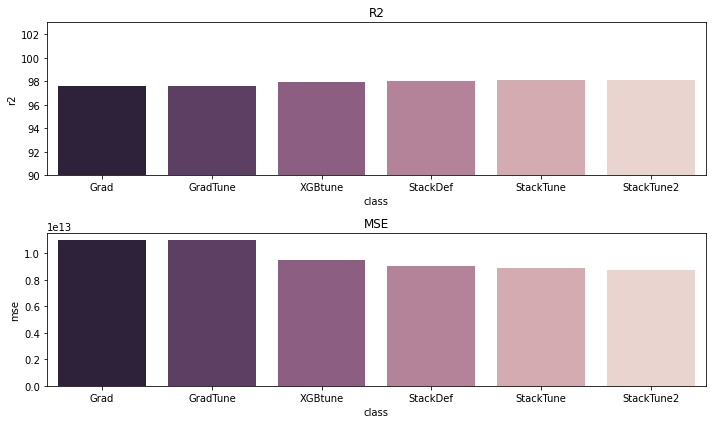

In [28]:
fig, axs = plt.subplots(2, 1, figsize=(10,6))

g=sns.barplot(ax=axs[0], x="class", y="r2", data=oh,
            palette=sns.cubehelix_palette(n_colors=6, reverse=True))
axs[0].set_title("R2")
g1=sns.barplot(ax=axs[1], x="class", y="mse", data=oh,
            palette=sns.cubehelix_palette(n_colors=6, reverse=True))
axs[1].set_title('MSE')

g.set(ylim=(90, None))
plt.tight_layout()

### Conclusion

Both of team members participated in the project. In this work we compared the performance of various models by their r2 and mse scores. The main models for the comparison are GradientBoostingRegressor, XGBRegressor and StackingRegressor. As it can be seen on te bar charts above, the StackingRegressor outperformed other two models